In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/word2vec-nlp-tutorial/testData.tsv.zip
/kaggle/input/word2vec-nlp-tutorial/sampleSubmission.csv
/kaggle/input/word2vec-nlp-tutorial/unlabeledTrainData.tsv.zip
/kaggle/input/word2vec-nlp-tutorial/labeledTrainData.tsv.zip


In [2]:
import zipfile
import os

DATA_IN_PATH = '../input/word2vec-nlp-tutorial/'

file_list = os.listdir(DATA_IN_PATH)
file_list.remove('sampleSubmission.csv')

In [3]:
for file in file_list:
    zipRef = zipfile.ZipFile(DATA_IN_PATH+file,'r')
    zipRef.extractall('/kaggle/working')
    zipRef.close()

In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
train_data = pd.read_csv('/kaggle/working/'+"labeledTrainData.tsv",header=0,delimiter="\t",quoting=3)

In [6]:
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [7]:
'asd'.ljust(30)

'asd                           '

In [8]:
print('file size')
for file in os.listdir('/kaggle/working'):
    print(file.ljust(30)+str(round(os.path.getsize('/kaggle/working/'+file)/1000000,2))+'MB')

file size
testData.tsv                  32.72MB
labeledTrainData.tsv          33.56MB
__notebook_source__.ipynb     0.0MB
unlabeledTrainData.tsv        67.28MB


In [9]:
print(len(train_data))

25000


In [10]:
train_length = train_data['review'].apply(len)
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

Text(0, 0.5, 'Number of review')

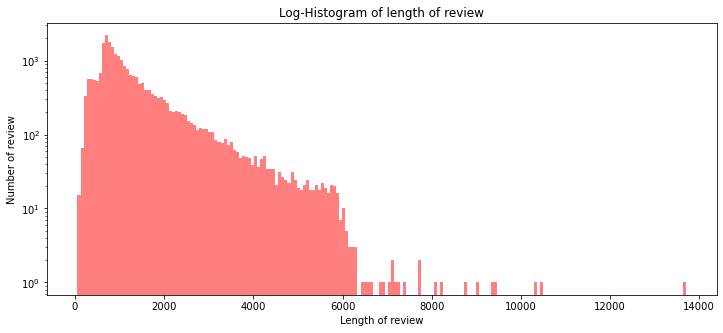

In [11]:
plt.figure(figsize=(12,5))
plt.hist(train_length, bins=200, alpha=.5, color='r', label='word')
plt.yscale('log',nonposy='clip')
plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')

In [12]:
print(np.max(train_length))
print(np.min(train_length))
print(np.mean(train_length))
print(np.std(train_length))
print(np.median(train_length))
print(np.percentile(train_length,25))
print(np.percentile(train_length,75))

13710
54
1329.71056
1005.2191407969154
983.0
705.0
1619.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd67778c410>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd67770cb90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd677707b90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd677711690>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd677716150>],
 'means': [<matplotlib.lines.Line2D at 0x7fd677711bd0>]}

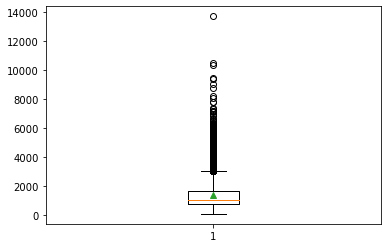

In [13]:
plt.boxplot(train_length,showmeans=True)

(-0.5, 799.5, 599.5, -0.5)

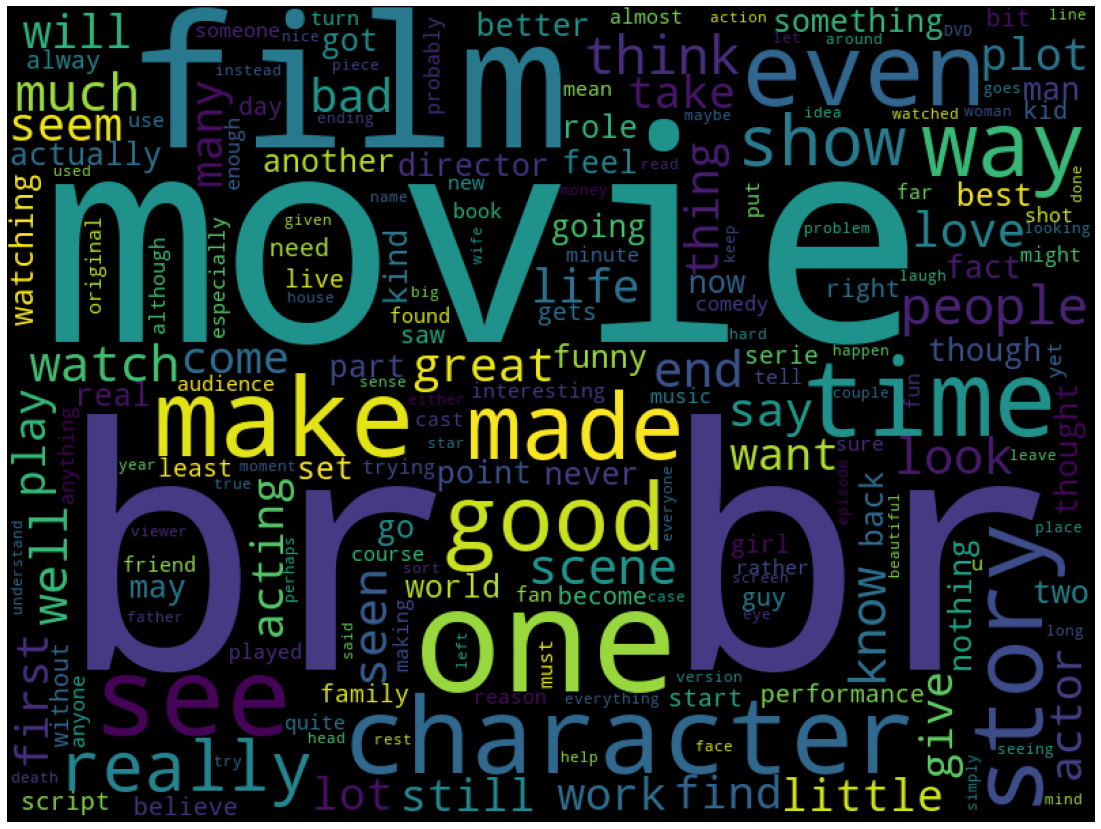

In [14]:
from wordcloud import WordCloud

cloud = WordCloud(width=800,height=600).generate(" ".join(train_data['review']))
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis('off')

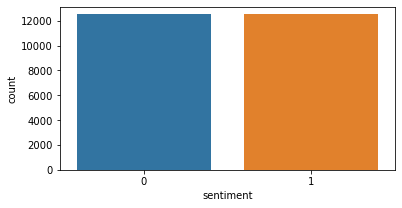

In [15]:
fig,ax = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_data['sentiment'])

In [16]:
train_data['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [17]:
train_word_counts = train_data['review'].apply(lambda x: len(x.split()))

Text(0, 0.5, '# of review')

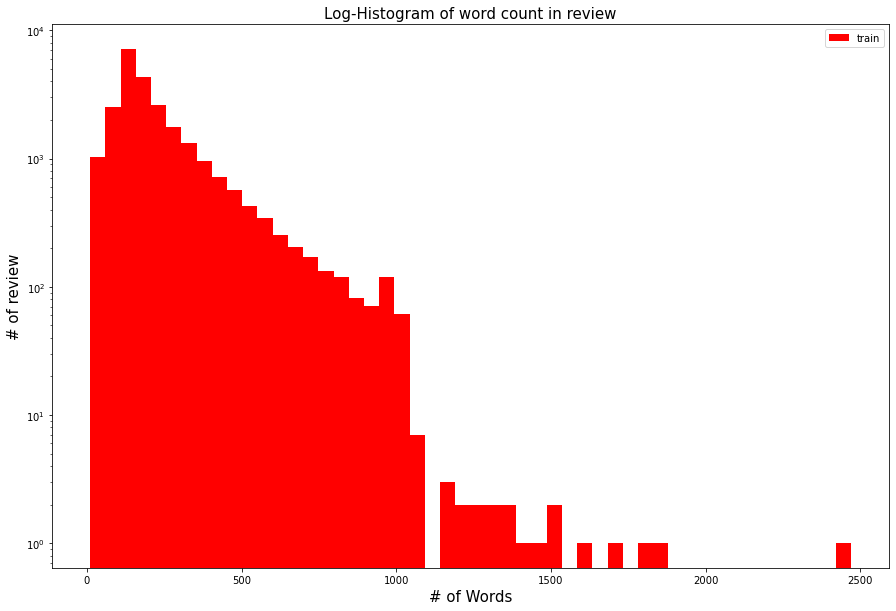

In [18]:
plt.figure(figsize=(15,10))
plt.hist(train_word_counts, bins=50,facecolor='r',label='train')
plt.title('Log-Histogram of word count in review',fontsize=15)
plt.yscale('log',nonposy='clip')
plt.legend()
plt.xlabel('# of Words', fontsize=15)
plt.ylabel('# of review', fontsize=15)


In [19]:
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x))
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x))
capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper()))
capitals = np.mean(train_data['review'].apply(lambda x: any([y.isupper() for y in x])))
numbers = np.mean(train_data['review'].apply(lambda x: any([y.isdigit() for y in x])))

print(qmarks)
print(fullstop)
print(capital_first)
print(capitals)
print(numbers)

0.29552
0.99688
0.0
0.99592
0.56656


In [20]:
import re 
import pandas
import numpy
import json
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer


In [21]:
DATA_IN_PATH = './'
train_data=pd.read_csv(DATA_IN_PATH+'labeledTrainData.tsv',header=0, delimiter='\t',quoting=3)
print(train_data['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [22]:
review = train_data['review'][0]
review_text = BeautifulSoup(review,'html5lib').get_text()
review_text = re.sub("[^a-zA-Z]"," ",review_text)
print(review_text)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

In [23]:
stop_words = set(stopwords.words('english'))
review_text = review_text.lower()
words = review_text.split()
words = [w for w in words if not w in stop_words]
print(words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

In [24]:
clean_review = ' '.join(words)
print(clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [25]:
def preprocessing(review,remove_stopwords=False):
    review_text = BeautifulSoup(review,'html5lib').get_text()
    review_text = re.sub('[^a-zA-Z]',' ',review_text)
    words = review_text.lower().split()
    
    
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))        
        words = [w for w in words if not w in stop_words]
    
    return ' '.join(words)
    

In [26]:
clean_train_reviews = []
for review in train_data['review']:
    clean_train_reviews.append(preprocessing(review,remove_stopwords=1))

In [27]:
clean_train_reviews

['stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate worki

In [28]:
clean_train_df = pd.DataFrame({'review':clean_train_reviews,'sentiment':train_data['sentiment']})
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)

In [29]:
print(len(text_sequences))
print(len(text_sequences[0]))
print(len(text_sequences[1]))


25000
219
84


In [30]:
word_vocab = tokenizer.word_index
word_vocab["<PAD>"] = 0
print(word_vocab)

{'movie': 1, 'film': 2, 'one': 3, 'like': 4, 'good': 5, 'time': 6, 'even': 7, 'would': 8, 'story': 9, 'really': 10, 'see': 11, 'well': 12, 'much': 13, 'get': 14, 'bad': 15, 'people': 16, 'also': 17, 'first': 18, 'great': 19, 'made': 20, 'way': 21, 'make': 22, 'could': 23, 'movies': 24, 'think': 25, 'characters': 26, 'character': 27, 'watch': 28, 'two': 29, 'films': 30, 'seen': 31, 'many': 32, 'life': 33, 'plot': 34, 'acting': 35, 'never': 36, 'love': 37, 'little': 38, 'best': 39, 'show': 40, 'know': 41, 'ever': 42, 'man': 43, 'better': 44, 'end': 45, 'still': 46, 'say': 47, 'scene': 48, 'scenes': 49, 'go': 50, 'something': 51, 'back': 52, 'real': 53, 'watching': 54, 'though': 55, 'thing': 56, 'old': 57, 'years': 58, 'actors': 59, 'director': 60, 'work': 61, 'another': 62, 'new': 63, 'nothing': 64, 'funny': 65, 'actually': 66, 'makes': 67, 'look': 68, 'find': 69, 'going': 70, 'part': 71, 'lot': 72, 'every': 73, 'world': 74, 'cast': 75, 'us': 76, 'quite': 77, 'want': 78, 'things': 79, 'p

In [31]:
print(len(word_vocab))

74066


In [32]:
data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)+1

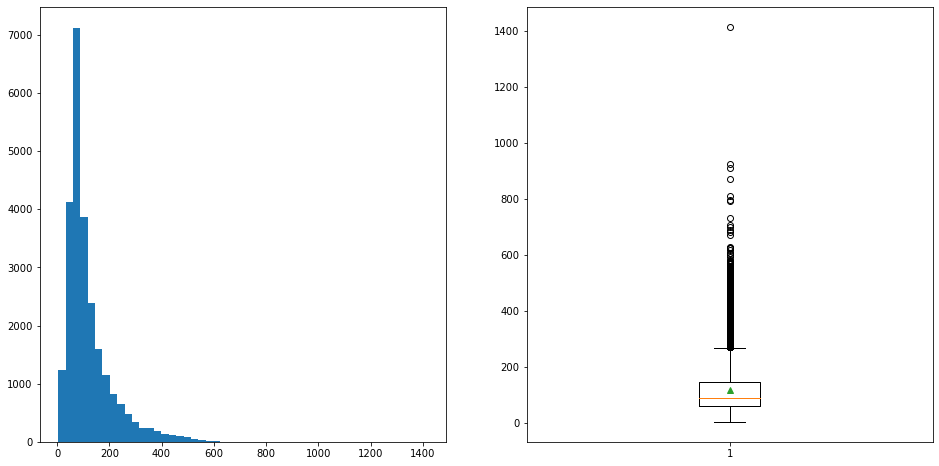

In [33]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].hist([len(x) for x in text_sequences],bins=50,)
ax[1].boxplot([len(x) for x in text_sequences],showmeans=True)
plt.show()



In [34]:
median_sequence_length = np.median(np.array([len(x) for x in text_sequences]))
print(median_sequence_length)

89.0


In [35]:
MAX_SEQUENCE_LENGTH = 174
train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
print(train_inputs.shape)

(25000, 174)


In [36]:
train_inputs[1]

array([  232,   203,  3048,  3565,  7116,   317,     2,   405,   153,
          19,   634, 10967, 11898,  8816,  1653,  1035,  3494,   232,
         154,   314,  7116,  2701,   178,     2,  2349,    87,  1111,
         582,   217,  2219,   149,    73,   160,   626,  1035,  2882,
         194,   642,  3316,  3464,  3869,   154,   405,   180,   155,
         158,    79,     1, 19718,  2177,  1251,    68,  6828,   170,
         281,   811,     1,   532, 10968,     4,  2003,    16,    36,
         881,  1251,   376,   634,   314,  7116,   159,  2564,  1653,
        1035,  3494,   232,   511,   143,   317,    20,   623,  4628,
        1251,  8974,  5471,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [37]:
train_labels = np.array(train_data['sentiment'])
print(train_labels.shape)

(25000,)


In [38]:
# RAW TEXT -> STRIP HTML TAG -> LOWER -> SPLIT -> DEL STOPWORDS -> JOIN -> TOKENIZE -> TEXTS TO INDEX -> PADDING

In [39]:
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
TRAIN_CLEAN_DATA = 'train_clean.csv'
DATA_CONFIGS = 'data_configs.json'

In [40]:
import os

if not os.path.exists('./output'):
    os.makedirs('./output')

In [41]:
DATA_OUT_PATH = './output/'

In [42]:
np.save(open(DATA_OUT_PATH+TRAIN_INPUT_DATA,'wb'),train_inputs)
np.save(open(DATA_OUT_PATH+TRAIN_LABEL_DATA,'wb'),train_labels)
clean_train_df.to_csv(DATA_OUT_PATH+TRAIN_CLEAN_DATA, index = False)
json.dump(data_configs,open(DATA_OUT_PATH+DATA_CONFIGS,'w'),ensure_ascii=False)

In [43]:
test_data=pd.read_csv(DATA_IN_PATH+"testData.tsv",header=0,delimiter='\t',quoting=3)
clean_test_reviews = []
for review in test_data['review']:
    clean_test_reviews.append(preprocessing(review,remove_stopwords=1))
test_id = np.array(test_data['id'])

# tokenizer.fit_on_texts(clean_test_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_test_reviews)
test_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [44]:
clean_test_df = pd.DataFrame({'review':clean_test_reviews,'id':test_data['id']})

In [45]:
# EXAMPLE

In [46]:
a = Tokenizer()
b=['hello asd you','quit hey']
c = ['hello you zz','merry christmas']
a.fit_on_texts(b)

In [47]:
print(a.word_index)
print(a.texts_to_sequences(b))

{'hello': 1, 'asd': 2, 'you': 3, 'quit': 4, 'hey': 5}
[[1, 2, 3], [4, 5]]


In [48]:
print(a.texts_to_sequences(c)) # ignore new words in test data

[[1, 3], []]


In [49]:
a.fit_on_texts(c)
print(a.word_index) # add

{'hello': 1, 'you': 2, 'asd': 3, 'quit': 4, 'hey': 5, 'zz': 6, 'merry': 7, 'christmas': 8}


In [50]:
TEST_INPUT_DATA = 'test_input.npy'
TEST_CLEAN_DATA = 'test_clean.csv'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_OUT_PATH+TEST_INPUT_DATA,'wb'),test_inputs)
np.save(open(DATA_OUT_PATH+TEST_ID_DATA,'wb'),test_id)
clean_test_df.to_csv(DATA_OUT_PATH+TEST_CLEAN_DATA,index=False)

In [51]:
# LOAD_DATA, MODELING

train_data = pd.read_csv(DATA_OUT_PATH+TRAIN_CLEAN_DATA,header=0,quoting=3)

reviews = list(train_data['review'])
sentiments = list(train_data['sentiment'])

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=0.0, analyzer='word', sublinear_tf=True, ngram_range=(1,3),
                            max_features=5000)
X = vectorizer.fit_transform(reviews)

In [53]:
vectorizer.vocabulary_

{'stuff': 4245,
 'going': 1852,
 'moment': 2819,
 'started': 4155,
 'listening': 2527,
 'music': 2946,
 'watching': 4800,
 'odd': 3087,
 'documentary': 1166,
 'watched': 4796,
 'maybe': 2716,
 'want': 4765,
 'get': 1811,
 'certain': 635,
 'insight': 2216,
 'guy': 1951,
 'thought': 4450,
 'really': 3557,
 'cool': 869,
 'eighties': 1271,
 'make': 2641,
 'mind': 2783,
 'whether': 4852,
 'guilty': 1947,
 'innocent': 2212,
 'part': 3215,
 'feature': 1530,
 'film': 1570,
 'remember': 3626,
 'see': 3857,
 'cinema': 709,
 'originally': 3168,
 'released': 3614,
 'subtle': 4262,
 'messages': 2754,
 'feeling': 1539,
 'towards': 4536,
 'press': 3393,
 'also': 122,
 'obvious': 3078,
 'message': 2753,
 'drugs': 1219,
 'bad': 289,
 'visually': 4740,
 'impressive': 2180,
 'course': 904,
 'michael': 2761,
 'jackson': 2276,
 'unless': 4666,
 'remotely': 3633,
 'like': 2493,
 'anyway': 183,
 'hate': 1998,
 'find': 1636,
 'boring': 455,
 'may': 2714,
 'call': 556,
 'making': 2656,
 'movie': 2854,
 'fans':

In [54]:
from sklearn.model_selection import train_test_split

RANDOM_SEED = 25
TEST_SPLIT = 0.2

y = np.array(sentiments)

X_train, X_eval, y_train, y_eval = train_test_split(X,y, test_size=TEST_SPLIT, random_state=RANDOM_SEED)

In [55]:
from sklearn.linear_model import LogisticRegression

lgs = LogisticRegression(class_weight='balanced')
lgs.fit(X_train,y_train)
print('Acc: {}'.format(lgs.score(X_eval,y_eval)))
#char 85.86%, word 88.9%

Acc: 0.889


In [56]:
TEST_CLEAN_DATA = 'test_clean.csv'
test_data = pd.read_csv(DATA_OUT_PATH+TEST_CLEAN_DATA, header=0)
testDataVecs = vectorizer.transform(test_data['review'])
test_predicted = lgs.predict(testDataVecs)

ids = list(test_data['id'])
answer_dataset = pd.DataFrame({'id':ids,'sentiment':test_predicted})


In [57]:
answer_dataset.id = answer_dataset.id.str.replace('"','')
answer_dataset.to_csv(DATA_OUT_PATH+'lgs_tfidf_answer.csv',index=False)

In [58]:
train_data = pd.read_csv(DATA_OUT_PATH+TRAIN_CLEAN_DATA)
reviews = list(train_data['review'])
sentiments = list(train_data['sentiment'])

sentences = []
for review in reviews:
    sentences.append(review.split())
    

In [59]:
print(len(sentences))
print(sentences[0])

25000
['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'l

In [60]:
num_features = 300   # embedding dim
min_word_count = 40  # min count word
num_workers = 1      
context = 10         # context window size
downsampling = 1e-3  # 

In [61]:
import gensim
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)

In [62]:
from gensim.models import word2vec
print('TRAINING MODEL')
model = word2vec.Word2Vec(sentences, workers=num_workers,size=num_features,min_count=min_word_count,
                          window=context,sample=downsampling)

TRAINING MODEL


In [63]:
model.save('300features_40minwords_10context')

In [64]:
def get_features(words, model, num_features):
    feature_vector = np.zeros((num_features),dtype=np.float32)
    num_words = 0
    index2word_set = set(model.wv.index2word)
    for w in words:
        if w in index2word_set:
            num_words += 1
            feature_vector = feature_vector+model[w]
    return np.divide(feature_vector,num_words)

In [65]:
def get_dataset(reviews, model, num_features):
    dataset=list()
    for s in reviews:
        dataset.append(get_features(s,model,num_features))
    reviewFeatureVecs = np.stack(dataset)
    return reviewFeatureVecs

In [66]:
test_data_vecs = get_dataset(sentences,model,num_features)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [67]:
test_data_vecs.shape

(25000, 300)

In [68]:
model.wv.index2word[:15]

['movie',
 'film',
 'one',
 'like',
 'good',
 'time',
 'even',
 'would',
 'story',
 'really',
 'see',
 'well',
 'much',
 'get',
 'bad']

In [69]:
X = test_data_vecs
y = np.array(sentiments)

X_train,X_eval,y_train,y_eval = train_test_split(X,y,test_size=TEST_SPLIT,random_state=RANDOM_SEED)

In [70]:
from sklearn.linear_model import LogisticRegression

lgs = LogisticRegression(class_weight='balanced')
lgs.fit(X_train,y_train)
print('ACC: {}'.format(lgs.score(X_eval,y_eval)))

ACC: 0.862


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [71]:
reviews = list(train_data['review'])
y = np.array(train_data['sentiment'])

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='word',max_features=5000)
train_data_features = vectorizer.fit_transform(reviews)

In [72]:
train_inputs, eval_input, train_label, eval_label = train_test_split(train_data_features, y, test_size=
                                                0.2,random_state=24)

In [73]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=200)
forest.fit(train_inputs,train_label)
print(forest.score(eval_input,eval_label))

0.8484


In [74]:
# Random Seed Setting
import tensorflow as tf

SEED_NUM = 1234
tf.random.set_seed(SEED_NUM)

In [75]:
train_input = np.load(open(DATA_OUT_PATH+TRAIN_INPUT_DATA,'rb'))
train_input = pad_sequences(train_input, maxlen=train_input.shape[1])
train_label = np.load(open(DATA_OUT_PATH+TRAIN_LABEL_DATA,'rb'))
prepro_configs = json.load(open(DATA_OUT_PATH+DATA_CONFIGS,'r'))

In [76]:
model_name = 'rnn_classifier_en'
BATCH_SIZE = 128
NUM_EPOCHS = 5
VALID_SPLIT = 0.1
MAX_LEN = train_input.shape[1]

kargs = {'model_name':model_name,
        'vocab_size':prepro_configs['vocab_size'],
        'embedding_dimension':100,
        'dropout_rate':0.2,
        'lstm_dimension':150,
        'dense_dimension':150,
        'output_dimension':1}

In [77]:
class RNNClassifier(tf.keras.Model):
    def __init__(self, **kargs):
        super(RNNClassifier, self).__init__(name=kargs['model_name'])
        self.embedding = tf.keras.layers.Embedding(input_dim=kargs['vocab_size'],
                                         output_dim=kargs['embedding_dimension'])
        self.lstm_1_layer = tf.keras.layers.LSTM(kargs['lstm_dimension'],return_sequences=True)
        self.lstm_2_layer = tf.keras.layers.LSTM(kargs['lstm_dimension'])
        self.dropout = tf.keras.layers.Dropout(kargs['dropout_rate'])
        self.fc1 = tf.keras.layers.Dense(units=kargs['dense_dimension'],
                                        activation=tf.keras.activations.tanh)
        self.fc2 =  tf.keras.layers.Dense(units=kargs['output_dimension'],
                                          activation=tf.keras.activations.sigmoid)
    def call(self,x):
        x = self.embedding(x)
        x = self.dropout(x)
        x = self.lstm_1_layer(x)
        x = self.lstm_2_layer(x)
        x = self.dropout(x)
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [78]:
model = RNNClassifier(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])



In [79]:
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=0.0001, patience=2)
checkpoint_path = DATA_OUT_PATH+model_name+'/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir,exist_ok=True)


cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_accuracy',verbose=1,save_best_only=True,
                             save_weights_only=True)
history = model.fit(train_input, train_label, batch_size = BATCH_SIZE, epochs=NUM_EPOCHS,
                   validation_split=VALID_SPLIT, callbacks=[earlystop_callback,cp_callback])

Epoch 1/5
176/176 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5053
Epoch 00001: val_accuracy improved from -inf to 0.50960, saving model to ./output/rnn_classifier_en/weights.h5
176/176 [==============================] - 162s 922ms/step - loss: 0.6931 - accuracy: 0.5053 - val_loss: 0.6929 - val_accuracy: 0.5096
Epoch 2/5
176/176 [==============================] - ETA: 0s - loss: 0.6805 - accuracy: 0.5345
Epoch 00002: val_accuracy improved from 0.50960 to 0.75760, saving model to ./output/rnn_classifier_en/weights.h5
176/176 [==============================] - 164s 932ms/step - loss: 0.6805 - accuracy: 0.5345 - val_loss: 0.4860 - val_accuracy: 0.7576
Epoch 3/5
176/176 [==============================] - ETA: 0s - loss: 0.3408 - accuracy: 0.8566
Epoch 00003: val_accuracy improved from 0.75760 to 0.88440, saving model to ./output/rnn_classifier_en/weights.h5
176/176 [==============================] - 164s 930ms/step - loss: 0.3408 - accuracy: 0.8566 - val_loss: 0

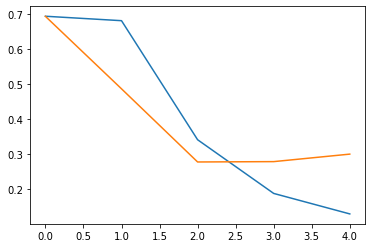

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

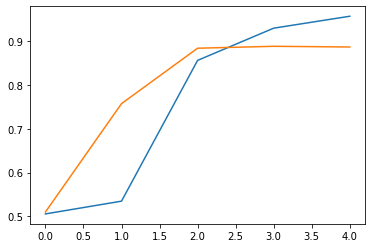

In [81]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [97]:
BATCH_SIZE=512
NUM_EPOCHS=2
VALID_SPLIT=0.1
MAX_LEN = train_input.shape[1]

kargs = {'model_name':model_name,
         'vocab_size':prepro_configs['vocab_size'],
         'embedding_size':128,
         'num_filters':100,
         'dropout_rate':0.5,
         'hidden_dimension':250,
         'output_dimension':1}

class CNNClassifier(tf.keras.Model):
    def __init__(self, **kargs):
        super(CNNClassifier, self).__init__(name=kargs['model_name'])
        self.embedding = tf.keras.layers.Embedding(input_dim=kargs['vocab_size'],output_dim=kargs['embedding_size'])
        self.conv_list = [tf.keras.layers.Conv1D(filters=kargs['num_filters'],kernel_size=kernel_size,
                                                padding='valid',activation=tf.keras.activations.relu,kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
                         for kernel_size in [3,4,5]]
        self.pooling = tf.keras.layers.GlobalMaxPooling1D()
        self.dropout = tf.keras.layers.Dropout(kargs['dropout_rate'])
        self.fc1 = tf.keras.layers.Dense(units=kargs['hidden_dimension'],activation=tf.keras.activations.relu,kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
        self.fc2 = tf.keras.layers.Dense(units=kargs['output_dimension'],activation=tf.keras.activations.sigmoid,kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
    
    def call(self,x):
        x = self.embedding(x)
        x = self.dropout(x)
        x = tf.concat([self.pooling(conv(x)) for conv in conv_list],axis=1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [98]:
model = CNNClassifier(**kargs)

In [ ]:
a=np.random.randn(1024,140,prepro_configs['vocab_size'])

In [ ]:
a.shape

In [107]:
(model.embedding(a)).shape

InvalidArgumentError: indices[768,0,40] = -1 is not in [0, 74067) [Op:ResourceGather]